In [2]:
import re

def extract_data_from_file(file_path):
    inputs = []
    outputs = []
    
    with open(file_path, 'r') as file:
        content = file.read()
        
        input_matches = re.findall(r'\(([\d.-]+) ([\d.-]+)\)', content.split("Inputs:")[1].split("Outputs:")[0])
        output_matches = re.findall(r'\(([\d.-]+) ([\d.-]+)\)', content.split("Outputs:")[1])
        
        for match in input_matches:
            inputs.append(complex(float(match[0]), float(match[1])))
        for match in output_matches:
            outputs.append(complex(float(match[0]), float(match[1])))
    
    return inputs, outputs

file_path = 'fft_results.txt'

inputs, outputs = extract_data_from_file(file_path)

print("Inputs:", inputs)
print("Outputs:", outputs)


Inputs: [(6+6j), (1+1j), (3+3j), (2+2j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j),

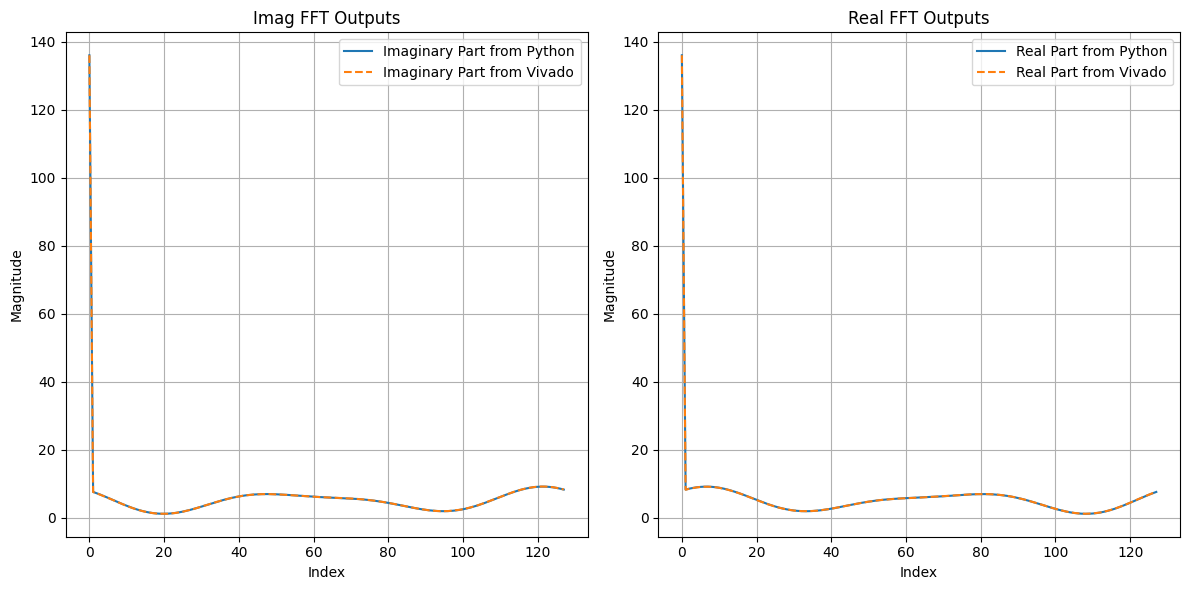

In [3]:
import numpy as np
import matplotlib.pyplot as plt
inputs = np.array(inputs)
outputs = np.array(outputs)

fft_outputs = np.fft.fft(inputs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Imag FFT Outputs")
plt.plot(fft_outputs.imag, label='Imaginary Part from Python', linestyle='-')
plt.plot(outputs.imag, label='Imaginary Part from Vivado',linestyle='--')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title("Real FFT Outputs")
plt.plot(fft_outputs.real, label='Real Part from Python', linestyle='-')
plt.plot(outputs.real, label='Real Part from Vivado', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

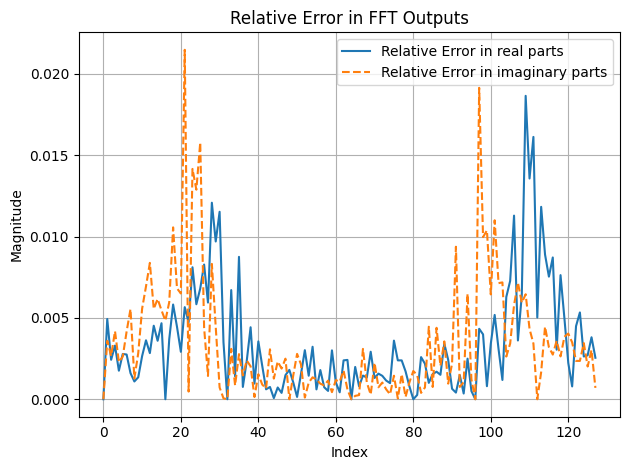

In [7]:
plt.title("Relative Error in FFT Outputs")
plt.plot([abs((i-j)/j) for i,j in zip(outputs.real,fft_outputs.real)], label='Relative Error in real parts', linestyle='-')
plt.plot([abs((i-j)/j) for i,j in zip(outputs.imag,fft_outputs.imag)], label='Relative Error in imaginary parts', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()